##### 寫入並儲存影片
這篇教學會介紹 OpenCV 裡的 VideoWriter() 方法，透過這個方法，可以將讀取到的影片 ( 電腦中的影片或攝影鏡頭拍攝的影片 )，\
進行轉檔或轉換色彩，儲存成新的影片檔。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 使用 VideoWriter() 儲存影片 
使用 VideoWriter() 方法，可以建立一個空的「影片檔」，將擷取到的影像圖片組成新的串流格式，寫入空的影片檔案裡，\
完成後就會儲存成新為新的影片，範例延伸「讀取並播放影片」的程式碼，進行下列的修改：

* 使用 cv2.VideoCapture() 讀取電腦攝影機鏡頭影像。
* 讀取影像後使用 cap.get() 方法取得影片長寬尺寸 ( 參考：get 方法可取得的影片屬性 )。
* 使用 cv2.VideoWriter_fourcc() 方法設定儲存的影片格式 ( 參考：[FOURCC](https://fourcc.org/codecs.php) )。
* 使用 cv2.VideoWriter() 產生空的影片檔案 ( 設定格式、幀率 fps、長寬 )。
* 在 while 迴圈裡使用 out.write() 方法，將取得的圖片寫入每一幀。
* 結束後使用 out.release() 釋放資源。

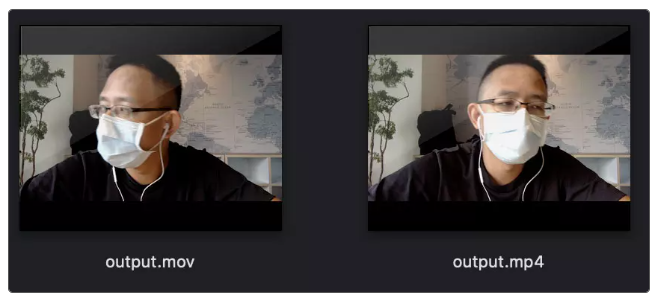

In [ ]:
import cv2
cap = cv2.VideoCapture(0)                         # 讀取電腦攝影機鏡頭影像。
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    # 取得影像寬度
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 取得影像高度
fourcc = cv2.VideoWriter_fourcc(*'MJPG')          # 設定影片的格式為 MJPG
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (width,  height))  # 產生空的影片
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    out.write(frame)       # 將取得的每一幀圖像寫入空的影片
    cv2.imshow('oxxostudio', frame)
    if cv2.waitKey(1) == ord('q'):
        break             # 按下 q 鍵停止
cap.release()
out.release()      # 釋放資源
cv2.destroyAllWindows()

##### 解決無法儲存影片的問題 
實作過程中，可能會遇到「無法儲存影片」的狀況，通常的解決方法有下面三種：

* 修改 fourcc 的影片格式，如果是 mov 或 mp4 的影片檔，使用「＊'mp4v'」、「＊'MJPG'」或「'M','J','P','G'」( 星號改半形 )。
* 將輸入影片的長寬和輸入的長寬度調整為「相同的長寬」。
* 修改影片的檔名，加上 01、02、03...等數字。

##### 搭配 cvtColor() 儲存為黑白的影片 
使用 cvtColor() 方法可以改變圖片的色彩，如果將影片每一幀的圖片套用 cvtColor()，最後就會呈現的改變顏色的影片，\
下面的程式碼執行後，就會讀取電腦攝影機，並將彩色影片轉換成黑白色彩的影片，最後儲存為黑白的影片。

* 色彩模式參考：[cvtColor() 顏色轉換名稱與數字對照](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

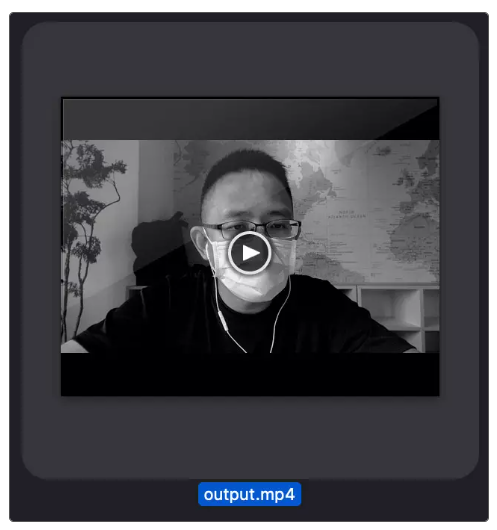

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.mov', fourcc, 20.0, (width,  height))
# 如果轉換成黑白影片後如果無法開啟，請加上 isColor=False 參數設定
# out = cv2.VideoWriter('output.mov', fourcc, 20.0, (width,  height), isColor=False)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 轉換成灰階
    out.write(gray)
    cv2.imshow('oxxostudio', gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

##### get 方法可取得的影片屬性 
上述的範例程式碼中，使用了 cap.get() 方法取得影片屬性，下方列出該方法可取得的屬性，以及對應的數字編號：

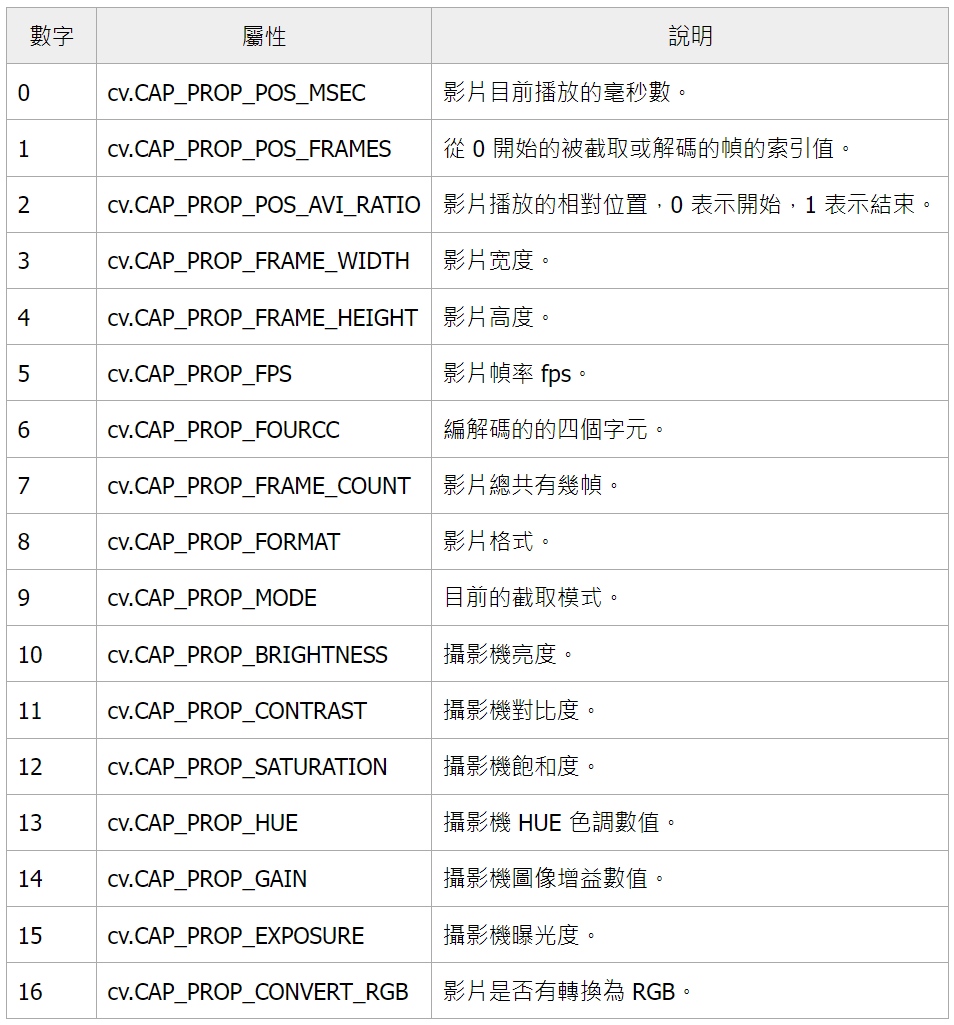